# Work to Python for Data Science Class

In [199]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import euclidean_distances

In [44]:
# Create your connection.
cnn = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player", cnn)
df.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [45]:
dfPA = pd.read_sql_query("SELECT * FROM Player_Attributes", cnn)
dfPA = dfPA.dropna()

In [34]:
selectedFeatures = ['crossing', 'finishing', 'heading_accuracy','short_passing', 'volleys', 'dribbling', 'curve', 
                    'free_kick_accuracy','long_passing', 'ball_control', 'acceleration', 'sprint_speed','agility',
                    'reactions', 'balance', 'shot_power', 'jumping', 'stamina','strength', 'long_shots', 'aggression', 
                    'interceptions', 'positioning','vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
                    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning','gk_reflexes']
df_select = dfPA[selectedFeatures].copy(deep=True)

In [154]:
data = scale(df_select)
#Define the number of clusters
noOfClusters = 11
#train the model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [228]:
df_select['cluster_label'] = model.labels_

# Inicialize um DataFrame vazio para armazenar os jogadores com os maiores valores de cada cluster
jogadores_max_por_cluster = pd.DataFrame(columns=df_select.columns)

# Loop através de cada cluster
for cluster in df_select['cluster_label'].unique():
    # Filtra o DataFrame para o cluster atual
    cluster_df = df_select[df_select['cluster_label'] == cluster].copy()
    
    max_values = cluster_df[selectedFeatures].max()
    
   # Calcula a distância euclidiana entre cada jogador e os maiores valores nas características desejadas
    distances = euclidean_distances(cluster_df[selectedFeatures], [max_values])
    
    # Encontra o jogador com a menor distância euclidiana (maior similaridade)
    max_similarity_idx = distances.argmin()
    max_player = cluster_df.iloc[max_similarity_idx] 
    # Adiciona o jogador ao DataFrame de resultados
    jogadores_max_por_cluster = pd.concat([jogadores_max_por_cluster, max_player.to_frame().transpose()])

# Agora 'jogadores_max_por_cluster' contém o(s) jogador(es) com os maiores valores nas características de interesse para cada cluster
jogadores_max_por_cluster

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,cluster_label
80992,48.0,51.0,63.0,61.0,44.0,51.0,59.0,53.0,49.0,56.0,55.0,53.0,45.0,47.0,66.0,51.0,66.0,79.0,66.0,43.0,73.0,65.0,61.0,40.0,51.0,71.0,72.0,71.0,13.0,13.0,49.0,6.0,10.0,1.0
59279,72.0,84.0,62.0,92.0,87.0,82.0,87.0,86.0,90.0,90.0,83.0,83.0,76.0,92.0,83.0,87.0,67.0,92.0,89.0,94.0,84.0,83.0,88.0,89.0,86.0,69.0,86.0,64.0,10.0,6.0,90.0,9.0,6.0,3.0
49009,72.0,54.0,54.0,70.0,59.0,68.0,69.0,52.0,58.0,70.0,68.0,67.0,81.0,66.0,79.0,60.0,72.0,82.0,72.0,55.0,72.0,42.0,44.0,51.0,43.0,67.0,64.0,68.0,32.0,35.0,41.0,34.0,35.0,6.0
34225,70.0,67.0,52.0,72.0,80.0,80.0,68.0,59.0,61.0,77.0,84.0,85.0,83.0,70.0,83.0,59.0,51.0,74.0,65.0,64.0,35.0,69.0,70.0,75.0,74.0,38.0,45.0,42.0,13.0,20.0,61.0,20.0,20.0,5.0
148485,53.0,79.0,73.0,64.0,74.0,81.0,56.0,56.0,51.0,77.0,73.0,72.0,70.0,65.0,73.0,79.0,73.0,65.0,80.0,67.0,76.0,57.0,68.0,71.0,74.0,31.0,36.0,29.0,6.0,22.0,51.0,22.0,22.0,7.0
66263,63.0,66.0,55.0,53.0,68.0,54.0,70.0,42.0,52.0,61.0,61.0,69.0,78.0,41.0,61.0,63.0,66.0,56.0,55.0,57.0,56.0,61.0,66.0,81.0,52.0,47.0,44.0,59.0,25.0,25.0,52.0,23.0,23.0,0.0
18039,60.0,56.0,84.0,75.0,59.0,69.0,51.0,58.0,71.0,70.0,72.0,76.0,68.0,79.0,58.0,74.0,90.0,76.0,88.0,59.0,80.0,79.0,54.0,66.0,57.0,81.0,85.0,79.0,6.0,14.0,15.0,13.0,11.0,4.0
107955,89.0,75.0,74.0,83.0,78.0,84.0,80.0,70.0,80.0,84.0,91.0,86.0,80.0,84.0,86.0,87.0,76.0,91.0,85.0,82.0,84.0,87.0,86.0,84.0,88.0,84.0,88.0,88.0,8.0,22.0,80.0,22.0,22.0,9.0
178971,80.0,94.0,80.0,88.0,89.0,86.0,81.0,80.0,86.0,92.0,86.0,86.0,80.0,89.0,89.0,91.0,79.0,87.0,89.0,87.0,94.0,84.0,89.0,88.0,88.0,37.0,36.0,41.0,11.0,21.0,86.0,21.0,21.0,10.0
165750,32.0,21.0,52.0,52.0,8.0,32.0,9.0,62.0,55.0,55.0,64.0,71.0,61.0,77.0,70.0,61.0,79.0,78.0,82.0,26.0,75.0,65.0,55.0,67.0,62.0,63.0,41.0,8.0,75.0,69.0,55.0,69.0,72.0,2.0


In [242]:
result_final = pd.merge(jogadores_max_por_cluster, dfPA, how='left')

In [245]:
merge_final = pd.merge(result_final,df, left_on='player_fifa_api_id', right_on='player_fifa_api_id', how='left')
merge_final

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,cluster_label,id_x,player_fifa_api_id,player_api_id_x,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,id_y,player_api_id_y,player_name,birthday,height,weight
0,48.0,51.0,63.0,61.0,44.0,51.0,59.0,53.0,49.0,56.0,55.0,53.0,45.0,47.0,66.0,51.0,66.0,79.0,66.0,43.0,73.0,65.0,61.0,40.0,51.0,71.0,72.0,71.0,13.0,13.0,49.0,6.0,10.0,1.0,80993,162364,45852,2007-02-22 00:00:00,67.0,74.0,left,medium,medium,4876,45852,Jeroen Drost,1987-01-21 00:00:00,182.88,163
1,72.0,84.0,62.0,92.0,87.0,82.0,87.0,86.0,90.0,90.0,83.0,83.0,76.0,92.0,83.0,87.0,67.0,92.0,89.0,94.0,84.0,83.0,88.0,89.0,86.0,69.0,86.0,64.0,10.0,6.0,90.0,9.0,6.0,3.0,59280,5471,30631,2007-02-22 00:00:00,90.0,92.0,right,high,medium,3544,30631,Frank Lampard,1978-06-20 00:00:00,182.88,196
2,72.0,54.0,54.0,70.0,59.0,68.0,69.0,52.0,58.0,70.0,68.0,67.0,81.0,66.0,79.0,60.0,72.0,82.0,72.0,55.0,72.0,42.0,44.0,51.0,43.0,67.0,64.0,68.0,32.0,35.0,41.0,34.0,35.0,6.0,49010,169366,26423,2012-08-31 00:00:00,66.0,66.0,left,medium,medium,2939,26423,Eloge Enza-Yamissi,1983-01-23 00:00:00,175.26,154
3,70.0,67.0,52.0,72.0,80.0,80.0,68.0,59.0,61.0,77.0,84.0,85.0,83.0,70.0,83.0,59.0,51.0,74.0,65.0,64.0,35.0,69.0,70.0,75.0,74.0,38.0,45.0,42.0,13.0,20.0,61.0,20.0,20.0,5.0,34226,51287,34574,2007-08-30 00:00:00,76.0,82.0,left,medium,medium,2055,34574,Damien Duff,1979-03-02 00:00:00,177.80,165
4,53.0,79.0,73.0,64.0,74.0,81.0,56.0,56.0,51.0,77.0,73.0,72.0,70.0,65.0,73.0,79.0,73.0,65.0,80.0,67.0,76.0,57.0,68.0,71.0,74.0,31.0,36.0,29.0,6.0,22.0,51.0,22.0,22.0,7.0,148486,116197,38755,2010-02-22 00:00:00,74.0,78.0,right,medium,low,8913,38755,Ricardo Fuller,1979-10-31 00:00:00,190.50,172
5,63.0,66.0,55.0,53.0,68.0,54.0,70.0,42.0,52.0,61.0,61.0,69.0,78.0,41.0,61.0,63.0,66.0,56.0,55.0,57.0,56.0,61.0,66.0,81.0,52.0,47.0,44.0,59.0,25.0,25.0,52.0,23.0,23.0,0.0,66264,171321,32734,2009-02-22 00:00:00,58.0,65.0,right,high,medium,3965,32734,Graham Dorrans,1987-05-05 00:00:00,175.26,161
6,60.0,56.0,84.0,75.0,59.0,69.0,51.0,58.0,71.0,70.0,72.0,76.0,68.0,79.0,58.0,74.0,90.0,76.0,88.0,59.0,80.0,79.0,54.0,66.0,57.0,81.0,85.0,79.0,6.0,14.0,15.0,13.0,11.0,4.0,18040,183284,56916,2015-10-23 00:00:00,81.0,81.0,right,medium,medium,1049,56916,Aurelien Chedjou,1985-06-20 00:00:00,182.88,190
7,89.0,75.0,74.0,83.0,78.0,84.0,80.0,70.0,80.0,84.0,91.0,86.0,80.0,84.0,86.0,87.0,76.0,91.0,85.0,82.0,84.0,87.0,86.0,84.0,88.0,84.0,88.0,88.0,8.0,22.0,80.0,22.0,22.0,9.0,107956,135455,34305,2009-08-30 00:00:00,86.0,88.0,right,high,medium,6486,34305,Maicon,1981-07-26 00:00:00,182.88,170
8,80.0,94.0,80.0,88.0,89.0,86.0,81.0,80.0,86.0,92.0,86.0,86.0,80.0,89.0,89.0,91.0,79.0,87.0,89.0,87.0,94.0,84.0,89.0,88.0,88.0,37.0,36.0,41.0,11.0,21.0,86.0,21.0,21.0,10.0,178972,54050,30829,2010-02-22 00:00:00,89.0,92.0,right,high,high,10749,30829,Wayne Rooney,1985-10-24 00:00:00,175.26,183
9,32.0,21.0,52.0,52.0,8.0,32.0,9.0,62.0,55.0,55.0,64.0,71.0,61.0,77.0,70.0,61.0,79.0,78.0,82.0,26.0,75.0,65.0,55.0,67.0,62.0,63.0,41.0,8.0,75.0,69.0,55.0,69.0,72.0,2.0,165751,125586,38805,2007-02-22 00:00:00,73.0,85.0,right,medium,medium,9948,38805,Stephan Andersen,1981-11-26 00:00:00,187.96,181


In [244]:
all_selection = pd.merge(dfPA, df, left_on='player_fifa_api_id', right_on='player_fifa_api_id', how='left')

In [160]:
#biggest_values = result_final.groupby('cluster_label').max()
#biggest_values.reset_index(inplace=True) 

In [166]:
#df_resultado = pd.merge(biggest_values, df, left_on='player_fifa_api_id', right_on='player_fifa_api_id', how='left')

In [246]:
linha_CR7 = all_selection[all_selection['player_name'].str.contains('Cristiano Ronaldo')]

In [254]:
linha_Rooney = all_selection[all_selection['player_name'].str.contains('Wayne Rooney')]

36

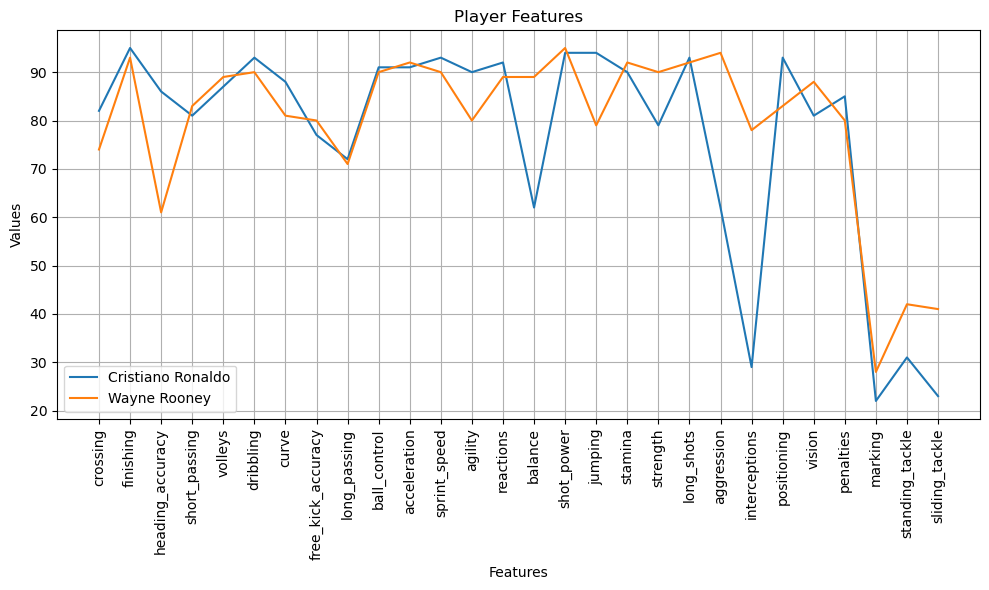

In [260]:
columns_plotar= ['crossing', 'finishing', 'heading_accuracy','short_passing', 'volleys', 'dribbling', 'curve', 
                    'free_kick_accuracy','long_passing', 'ball_control', 'acceleration', 'sprint_speed','agility',
                    'reactions', 'balance', 'shot_power', 'jumping', 'stamina','strength', 'long_shots', 'aggression', 
                    'interceptions', 'positioning','vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle']
plt.figure(figsize=(10,6))
plt.plot(linha_CR7.loc[linha_CR7.index[0],columns_plotar].T,label="Cristiano Ronaldo")
plt.plot(linha_Rooney.loc[linha_Rooney.index[35],columns_plotar].T,label="Wayne Rooney")
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Player Features')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()